# Introduction:
The following project is an implementation of Optical character recognition.
It uses the Tensorflow library to implement a Neural network which will be trained on the MNIST dataset to perform the desired operation. 

## Imports:

In [102]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Fetching data:

In [103]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path = 'mnist.npz')

## Exploring the data:

In [104]:
Xtrain_shape = X_train.shape
Ytrain_shape = y_train.shape
Xtest_shape = X_test.shape
Ytest_shape = y_test.shape
m_train = Xtrain_shape[0]
num_px = Xtrain_shape[1]
m_test = Xtest_shape[0]

print('Shape of input training set:',Xtrain_shape)
print('Shape of label training set:',Ytrain_shape)
print('Shape of input test set:',Xtest_shape)
print('Shape of label test set:',Ytest_shape)
print('Number of training examples:', m_train)
print('Number of test examples:', m_test)
print('Each image is of size: (' + str(num_px) + ', ' + str(num_px) + ')')

Shape of input training set: (60000, 28, 28)
Shape of label training set: (60000,)
Shape of input test set: (10000, 28, 28)
Shape of label test set: (10000,)
Number of training examples: 60000
Number of test examples: 10000
Each image is of size: (28, 28)


As we can see from the output of the previous cell, the training set consists of a total of 70,000 images which have been split into two parts: The training set and the test set.
The training set consists of 60,000 images and will be used to train the neural network and the test set will be used to evaluate the performance of the neural network once it has been trained. Each image of the training set has the dimensions (28,28). Let us look at the plots of some of the images to understand how the data to the neural network looks like:

16328th image in training set is the number 2


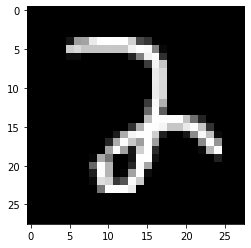

In [105]:
index = random.randint(0,60000)
print('{}th image in training set is the number {}'.format(index, y_train[index]))
plt.imshow(X_train[index])

## Helper class for handling callbacks:
In the following cell, we define a class myCallback which will be used to handle callbacks from during the training process. In the context of this project, it will be used to check whether the neural network that we are training has achieved a certain level of accuracy. If it has, we can stop the training process as we have achieved our desired accuracy. Let us assume that we can stop the training process if we achieve an accuracy score of 99% or higher.

In [106]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('accuracy') is not None and logs.get('accuracy') > 0.99):
            print('\nReached accuracy of 99%. Stopping training process!')
            self.model.stop_training = True

## Normalizing the data:
When we are working with big numbers, it is a good practice to normalize the data that we are working with so that it lies between 0 and 1. This ensures better performance of the neural network. Since we are working with image data, we know that the values of the pixels lies between 0 and 255. Hence, by dividing the training and test data with the number 255, we can normalize our data.

In [107]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Defining the neural network:
In the following section, we will define the structure of the neural network that we want to train. We will train neural networks with varying number of layers and neurons to compare the performances and choose the best one among them.
We will start with a 2 layered neural network and go upto 4 layers.
### Defining the 2 layered neural network:
In the 2 layered neural network, the layers are the input and output layers. Hence, the number neurons in the input layer will be 784 because the size of the input images is (28 * 28). The output layer will contain 10 neurons because there are 10 digits, i.e 0-9 that we are trying to classify.

In [121]:
twoLayeredModel = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

### Defining the 3 layered neual network:
In the 3 layered neural network, the  layers are the input, output and one hidden layer. The number of neurons in the input and output layers will be the same as the 2 layered neural network. The number of neurons in the hidden layer can be varied and hence, we will try the following number of neurons in the 3 layered neural network: 128, 256, 512 and 1024.

In [122]:
threeLayeredModel_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

threeLayeredModel_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

threeLayeredModel_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

threeLayeredModel_4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(1024, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

### Defining the 4 layered neural network:
In the 4 layered neural network, the number of neurons in the input and output layers will be the same as the 2 layered and 3 layered neural networks. The number of neurons in the 2 hidden layers can be varied. We will train the following 3 models.

In [123]:
fourLayeredModel_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

fourLayeredModel_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(768, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

fourLayeredModel_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(896, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

## Compiling the neural networks:
As we have finished defining our neural networks, the next step is to compile the neural networks. Here, we will be defining the optimizer and loss functions for our neural networks. The optimizer function we are using is the adam optimizer function and the loss function we are using is the sparse_categorical_crossentropy function.

In [124]:
twoLayeredModel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

threeLayeredModel_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
threeLayeredModel_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
threeLayeredModel_3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
threeLayeredModel_4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

fourLayeredModel_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
fourLayeredModel_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
fourLayeredModel_3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Training the neural networks:
The last step is to train the different neural networks that we have created with the mnist dataset. First, we create an object of myCallback class to detect 99% accuracy condition.

In [125]:
callbacks = myCallback()

In [126]:
twoLayeredModelHistory = twoLayeredModel.fit(X_train, y_train, epochs = 10, callbacks = [callbacks])
print('Two layered model summary:\nNumber of epochs: {}\nBest accuracy score: {}'.format(twoLayeredModelHistory.epoch, max(twoLayeredModelHistory.history['accuracy'])*100))

threeLayeredModel1History = threeLayeredModel_1.fit(X_train, y_train, epochs = 10, callbacks = [callbacks])
print('Three layered model with 128 neurons in hidden layer summary:\nNumber of epochs: {}\nBest accuracy score: {}'.format(threeLayeredModel1History.epoch, max(threeLayeredModel1History.history['accuracy'])*100))
threeLayeredModel2History = threeLayeredModel_2.fit(X_train, y_train, epochs = 10, callbacks = [callbacks])
print('Three layered model with 256 neurons in hidden layer summary:\nNumber of epochs: {}\nBest accuracy score: {}'.format(threeLayeredModel2History.epoch, max(threeLayeredModel2History.history['accuracy'])*100))
threeLayeredModel3History = threeLayeredModel_3.fit(X_train, y_train, epochs = 10, callbacks = [callbacks])
print('Three layered model with 512 neurons in hidden layer summary:\nNumber of epochs: {}\nBest accuracy score: {}'.format(threeLayeredModel3History.epoch, max(threeLayeredModel3History.history['accuracy'])*100))
threeLayeredModel4History = threeLayeredModel_4.fit(X_train, y_train, epochs = 10, callbacks = [callbacks])
print('Three layered model with 1024 neurons in hidden layer summary:\nNumber of epochs: {}\nBest accuracy score: {}'.format(threeLayeredModel4History.epoch, max(threeLayeredModel4History.history['accuracy'])*100))

fourLayeredModel1History = fourLayeredModel_1.fit(X_train, y_train, epochs = 10, callbacks = [callbacks])
print('Four layered model with 512 neurons in first hidden layer and 512 neurons in second hidden layer summary:\nNumber of epochs: {}\nBest accuracy score: {}'.format(fourLayeredModel1History.epoch, max(fourLayeredModel1History.history['accuracy'])*100))
fourLayeredModel2History = fourLayeredModel_2.fit(X_train, y_train, epochs = 10, callbacks = [callbacks])
print('Four layered model with 256 neurons in first hidden layer and 768 neurons in second hidden layer summary:\nNumber of epochs: {}\nBest accuracy score: {}'.format(fourLayeredModel2History.epoch, max(fourLayeredModel2History.history['accuracy'])*100))
fourLayeredModel3History = fourLayeredModel_3.fit(X_train, y_train, epochs = 10, callbacks = [callbacks])
print('Four layered model with 128 neurons in first hidden layer and 896 neurons in second hidden layer summary:\nNumber of epochs: {}\nBest accuracy score: {}'.format(fourLayeredModel3History.epoch, max(fourLayeredModel3History.history['accuracy'])*100))

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4705 - accuracy: 0.8774
Epoch 2/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3034 - accuracy: 0.9153
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2829 - accuracy: 0.9206
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2734 - accuracy: 0.9233
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2666 - accuracy: 0.9256
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2619 - accuracy: 0.9266
Epoch 7/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2587 - accuracy: 0.9276
Epoch 8/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2554 - accuracy: 0.9292
Epoch 9/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2532 - accuracy: 0.9293
Epoch 10/10
60

## Testing the neural networks on unseen data:
In the following section, we will test all our trained neural networks on our test set X_test.

In [127]:
twoLayerResult = twoLayeredModel.evaluate(X_test, y_test)

threeLayerResult1 = threeLayeredModel_1.evaluate(X_test, y_test)
threeLayerResult2 = threeLayeredModel_2.evaluate(X_test, y_test)
threeLayerResult3 = threeLayeredModel_3.evaluate(X_test, y_test)
threeLayerResult4 = threeLayeredModel_4.evaluate(X_test, y_test)

fourLayerResult1 = fourLayeredModel_1.evaluate(X_test, y_test)
fourLayerResult2 = fourLayeredModel_2.evaluate(X_test, y_test)
fourLayerResult3 = fourLayeredModel_3.evaluate(X_test, y_test)

print('Observed results:')
print('Loss and accuracy of 2 layered neural network-\nAccuracy: {}\tLoss: {}\n'.format(twoLayerResult[1] * 100, twoLayerResult[0] * 100))

print('Loss and accuracy of first 3 layered neural network-\nAccuracy: {}\tLoss: {}\n'.format(threeLayerResult1[1] * 100, threeLayerResult1[0] * 100))
print('Loss and accuracy of second 3 layered neural network-\nAccuracy: {}\tLoss: {}\n'.format(threeLayerResult2[1] * 100, threeLayerResult2[0] * 100))
print('Loss and accuracy of third 3 layered neural network-\nAccuracy: {}\tLoss: {}\n'.format(threeLayerResult3[1] * 100, threeLayerResult3[0] * 100))
print('Loss and accuracy of fourth 3 layered neural network-\nAccuracy: {}\tLoss: {}\n'.format(threeLayerResult4[1] * 100, threeLayerResult4[0] * 100))

print('Loss and accuracy of first 4 layered neural network-\nAccuracy: {}\tLoss: {}\n'.format(fourLayerResult1[1] * 100, fourLayerResult1[0] * 100))
print('Loss and accuracy of second 4 layered neural network-\nAccuracy: {}\tLoss: {}\n'.format(fourLayerResult2[1] * 100, fourLayerResult2[0] * 100))
print('Loss and accuracy of third 4 layered neural network-\nAccuracy: {}\tLoss: {}\n'.format(threeLayerResult3[1] * 100, threeLayerResult3[0] * 100))

10000/10000 [==============================] - 1s 56us/sample - loss: 0.1051 - accuracy: 0.9760
Observed results:
Loss and accuracy of 2 layered neural network-
Accuracy: 92.58000254631042	Loss: 26.516980631351473

Loss and accuracy of first 3 layered neural network-
Accuracy: 97.71000146865845	Loss: 7.114940251931548

Loss and accuracy of second 3 layered neural network-
Accuracy: 97.72999882698059	Loss: 7.717044354443788

Loss and accuracy of third 3 layered neural network-
Accuracy: 97.86999821662903	Loss: 7.433205621260859

Loss and accuracy of fourth 3 layered neural network-
Accuracy: 97.71999716758728	Loss: 8.322871014319972

Loss and accuracy of first 4 layered neural network-
Accuracy: 97.89000153541565	Loss: 8.962629477282782

Loss and accuracy of second 4 layered neural network-
Accuracy: 97.35999703407288	Loss: 11.001411170655338

Loss and accuracy of third 4 layered neural network-
Accuracy: 97.86999821662903	Loss: 7.433205621260859

